# Demonstrate some basic functionality for multi-model intercomparison

For this example, we will read `fgco2`, the air-sea flux of CO$_{2}$, from several models and compute a regional integral.

In [1]:
%matplotlib inline
import os
import sys
import xarray as xr

# TODO: add setup and use "pip -e install CMIPtools"
sys.path.insert(0,os.path.abspath('../../CMIPtools'))
import cmip5data as cmip5

### which models have CO2 flux?

Query database for `experiment` and `varname`.

In [2]:
models_avail = cmip5.find_in_index(experiment='esmHistorical',varname='fgco2').model.unique()
models_avail

array(['inmcm4', 'GFDL-ESM2G', 'GFDL-ESM2M', 'CanESM2', 'HadGEM2-ES',
       'bcc-csm1-1', 'IPSL-CM5A-LR', 'BNU-ESM', 'MPI-ESM-LR', 'CESM1-BGC',
       'bcc-csm1-1-m', 'MRI-ESM1', 'FIO-ESM', 'NorESM1-ME', 'MIROC-ESM'], dtype=object)

### read data for each model

In [3]:
models = ['IPSL-CM5A-LR',
          'HadGEM2-ES',
          'MPI-ESM-LR',
          'MRI-ESM1',
          'NorESM1-ME',
          'GFDL-ESM2G',
          'GFDL-ESM2M',
          'CESM1-BGC']

dss = {}
for m in models:
    if m not in models_avail: 
        print('{0} not available'.format(m))
        continue
    dss[m] = cmip5.open_model_mfdataset(model=m,
                                        frequency='mon',
                                        experiment='esmHistorical',
                                        varname='fgco2')    

print metadata

In [4]:
for model,ds in dss.items():
    print('-'*30)
    print(model)
    ds.info()
    print('\n')

------------------------------
IPSL-CM5A-LR
xarray.Dataset {
dimensions:
	bnds = 2 ;
	ens = 1 ;
	i = 182 ;
	j = 149 ;
	time = 1872 ;
	vertices = 4 ;

variables:
	datetime64[ns] time(time) ;
		time:bounds = time_bnds ;
		time:axis = T ;
		time:long_name = time ;
		time:standard_name = time ;
	int32 j(j) ;
		j:units = 1 ;
		j:long_name = cell index along second dimension ;
	int32 i(i) ;
		i:units = 1 ;
		i:long_name = cell index along first dimension ;
	float32 lat(j, i) ;
		lat:standard_name = latitude ;
		lat:long_name = latitude coordinate ;
		lat:units = degrees_north ;
		lat:bounds = lat_vertices ;
	float32 lon(j, i) ;
		lon:standard_name = longitude ;
		lon:long_name = longitude coordinate ;
		lon:units = degrees_east ;
		lon:bounds = lon_vertices ;
	float64 time_bnds(ens, time, bnds) ;
	float32 lat_vertices(ens, j, i, vertices) ;
		lat_vertices:units = degrees_north ;
	float32 lon_vertices(ens, j, i, vertices) ;
		lon_vertices:units = degrees_east ;
	float64 fgco2(ens, time, j, i)

### some quick plots
Loop over the models and take a mean across time and ensemble members (most model only have one ensemble member).

/glade/p/work/mclong/miniconda2/envs/py2/lib/python2.7/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


CPU times: user 1min 35s, sys: 33.7 s, total: 2min 8s
Wall time: 2min 11s


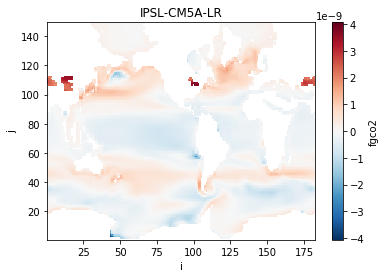

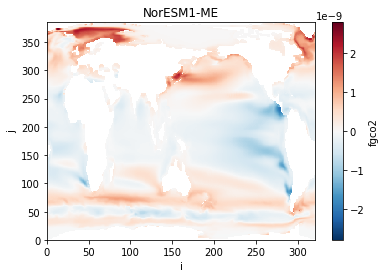

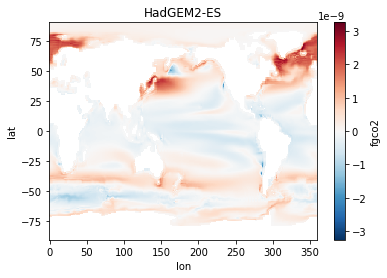

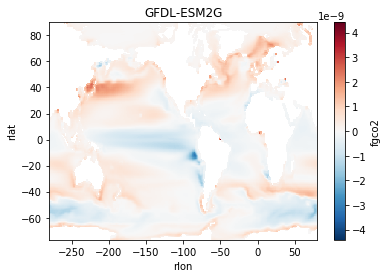

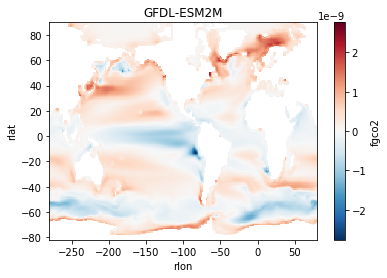

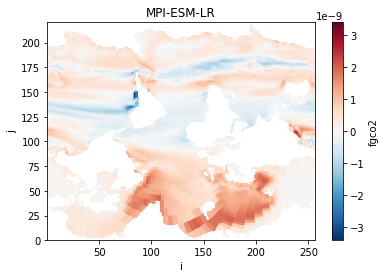

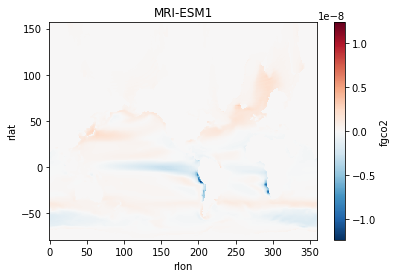

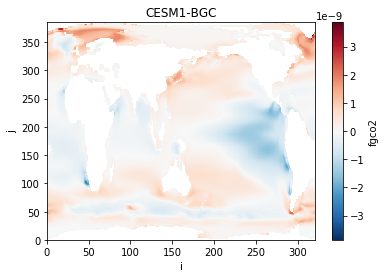

In [5]:
%%time
for model,ds in dss.items():
    plt.figure()
    ds.fgco2.mean(dim=['ens','time']).plot()
    plt.gca().set_title(model)

### define region mask and compute regional integrals